# Motivation

Claude Shannon, a mathematicain and an electrical engineer, talked about a strategy that benefits from volatility (source: [here](https://www.amazon.ca/Fortunes-Formula-Scientific-Betting-Casinos/dp/0809045990)). The strategy works by rebalancing the investment portfolio at every specific period. Our goal is to implement his strategy and find out in what condition it would be profitable.

Let's implement shannon's strategy to know how it works.

# The Strategy

The strategy is simple. Pick two assets and a percentage of those assets in a portfolio. When the asset's price change in a period (day), sell/buy the asset to keep the percentages constant in the portfolio.
We assume the assset's price goes up and down indefinitely.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (10,6)

In [2]:
init_price = 100.00 # initial price of the asset
final_day = 100 # number of days of the experiment
days = np.arange(1,final_day)
price = np.arange(1,float(final_day))
price[0] = init_price


class Portfolio:
    def __init__(self, size, percentage_1, percentage_2):
        self.stocks = size*percentage_1
        self.cash = size*percentage_2
        self.value = self.cash + self.stocks
        
    def set_value(self):
        self.value = self.cash + self.stocks
        
    def set_shannon(self):
        self.stocks = self.stocks + (self.value/2.0 - self.stocks)
        self.cash = self.value - self.stocks
        
portfolio_size = 100.00 # inital size of the portfolio
# The percentage of two assets in the portfolio
percentage_1 = 0.5
percentage_2 = 0.5
portfolio = Portfolio(portfolio_size, percentage_1, percentage_2)
portfolio.set_value()

shannon_value = np.arange(1,float(final_day))
shannon_value[0] = portfolio.value # shannon's portfolio is initialized

def testing_strategy(days, pct_change_up, pct_change_down, price, portfolio, shannon_value):
    portfolio = Portfolio(portfolio_size, percentage_1, percentage_2)    
    for day in range(len(days)-1):
        # increase the asset's price in even days and decrease in odd days
        if (day % 2) == 0:
            percent = pct_change_down
        else:
            percent = pct_change_up
        price[day+1] = price[day]*percent
        # apply the change in assset's price to the portfolio's asset valuation
        portfolio.stocks = portfolio.stocks*percent
        # set new total valuation of the potfoilo
        portfolio.set_value()
        # apply the shannon's strategy
        portfolio.set_shannon()
        shannon_value[day+1] = portfolio.value

## Case 1: Price goes down, low volatility

In [3]:
pct_change_down = 1 - 0.1
pct_change_up = 1 + 0.1

In [4]:
testing_strategy(days, pct_change_up, pct_change_down, price, portfolio, shannon_value)

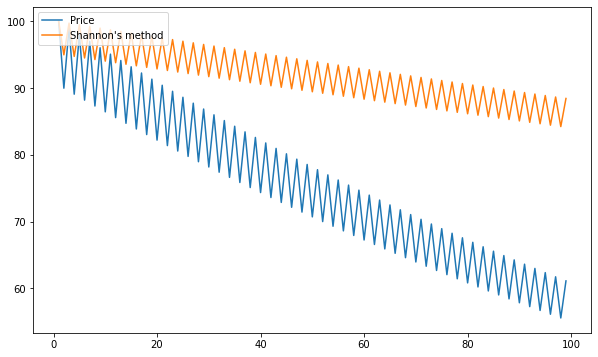

In [5]:
plt.plot(days, price, label='Price')
plt.plot(days, shannon_value, label='Shannon\'s method')
plt.legend(loc="upper left")
plt.show()

## Case 2: Price goes up, low volatility

In [6]:
pct_change_down = 1 - 0.1
pct_change_up = 1 + 0.15

In [7]:
testing_strategy(days, pct_change_up, pct_change_down, price, portfolio, shannon_value)

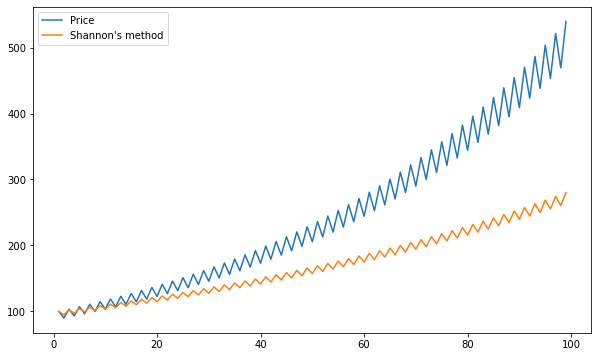

In [8]:
plt.plot(days, price, label='Price')
plt.plot(days, shannon_value, label='Shannon\'s method')
plt.legend(loc="upper left")
plt.show()

## Case 3: Price goes sidways, high volatility

In [9]:
pct_change_down = 1 - 0.37
pct_change_up = 1 + 0.6

In [10]:
testing_strategy(days, pct_change_up, pct_change_down, price, portfolio, shannon_value)

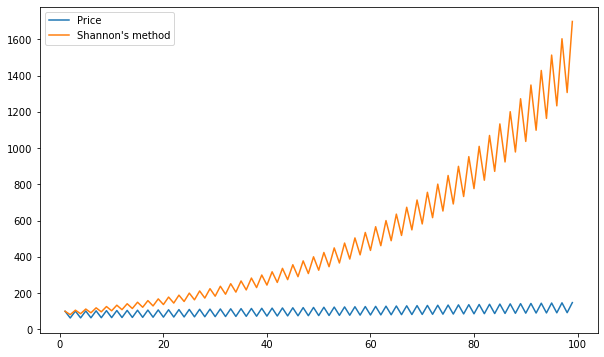

In [12]:
plt.plot(days, price, label='Price')
plt.plot(days, shannon_value, label='Shannon\'s method')
plt.legend(loc="upper left")
plt.savefig('highVol.png')
plt.show()

# Conclusion and future steps

As Shannon's said, this strategy works best in a high volatility, with stable range of asset price (Case 3). It can reduce the loss in downward price movemnet (Case 1), but it definiltely misses the profit in a bull market (Case 2). Other intesting steps would be

- Applying Shannon's strategy on multi-asset potfolio
- Quantifying volatility and risk/reward ratios in different cases
- What assets and markets would be the best for this strategy?